In [5]:
!pip install nilearn
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(nib.load(yeo.maps).get_data().ravel())) 
- 1))
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, 
memory='nilearn_cache')
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males
train_input = input_variables[:80]
train_output = output_variable[:80]

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


1000 regions found in this atlas


In [6]:
y = list(range(80))
# take 100 bootstraps using random indices, that way don't have to zip them or anything, just use index to pick the input and output 
bootstraps_input = []
bootstraps_output = []
bootstraps_model_coef = []
# bootstarps_model = []

np.random.seed(0)

for i in range(100):
  indices = np.random.choice(y,80) #common to choose sample size the same as the original, so each bootstrap should contain 80 samples.
  bootstraps_input.append(train_input[indices]) 
  bootstraps_output.append(train_output[indices])
  model = L1_model = LogisticRegression(penalty='l1', solver='saga', C=1.0).fit(train_input[indices]+ np.random.randn(80, 1000) * 0.1,train_output[indices])
  bootstraps_model_coef.append(model.coef_)
  # bootstarps_model.append(model)

bootstraps_input = np.array(bootstraps_input)
bootstraps_output = np.array(bootstraps_output)
bootstraps_model_coef = np.array(bootstraps_model_coef)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

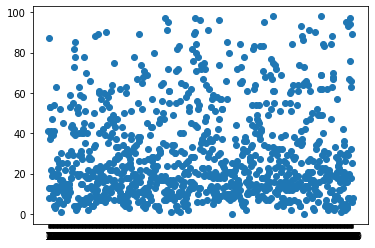

In [7]:
bootstraps_model_coef = bootstraps_model_coef.squeeze()
bootstraps_model_coef = np.transpose(bootstraps_model_coef)
occur = []
for feature in bootstraps_model_coef:
  occur.append((feature != 0).sum())

plt.xticks(list(range(1000)))
plt.scatter(list(range(1000)),occur)